In [17]:
import plot_phylo

import ete3

## 1. Make a blank figure

The first step is to make an empty figure and subplot where we can display our phylogenetic tree. 

To do this, we use [matplotlib](https://matplotlib.org/), a plotting package, directly. 

You need to import matplotlib and, if working in a Jupyter notebook, allow matplotlib to directly plot in the notebook (`%matplotlib inline`)


In [87]:
# Import the matplotlib package
import matplotlib.pyplot as plt

# Allow Jupyter to plot using matplotlib
%matplotlib inline

Now we can make the blank figure.

* `plt.figure` generates a blank figure, `figsize=(8, 6)` means that this figure will have a width of 8 inches and a height of 6 inches.
* `fig.add_subplot` adds an "ax" to this figure - an area in which to plot data. The ax is named `subp`.

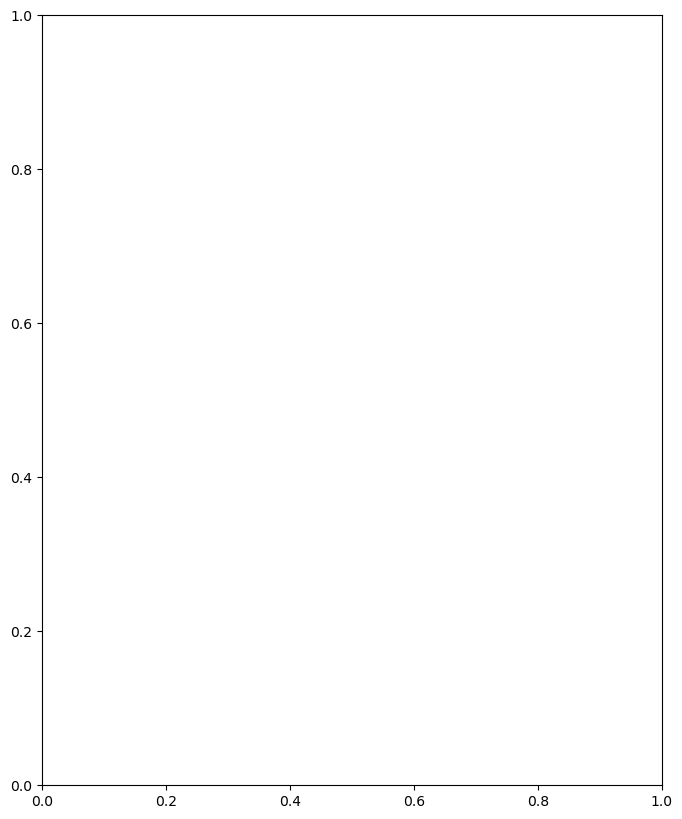

In [88]:
# Make the figure
fig = plt.figure(figsize=(8, 10))

# Add an ax
subp = fig.add_subplot(111)

## 2. Draw a basic phylogenetic tree

First, let's draw a phylogenetic tree with the default settings.

The tree is in newick format and is a clade extracted from the gene tree for the actin beta (ACTB) gene (ENSG00000075624) downloaded from Ensembl release 113 on Feb 4 2025. It is saved as `ACTB_gene_tree_small.nh`.

This tree doesn't have branch support included, so I will turn this off.

* `plot_phylo` is the main plotting function in this package
* `tree="ACTB_gene_tree_small.nh"` - the tree in newick format is in the file ACTB_gene_tree_small.nh
* `ax=subp` - use the ax `subp` which we previously created
* `show_support=False` - don't display the branch support

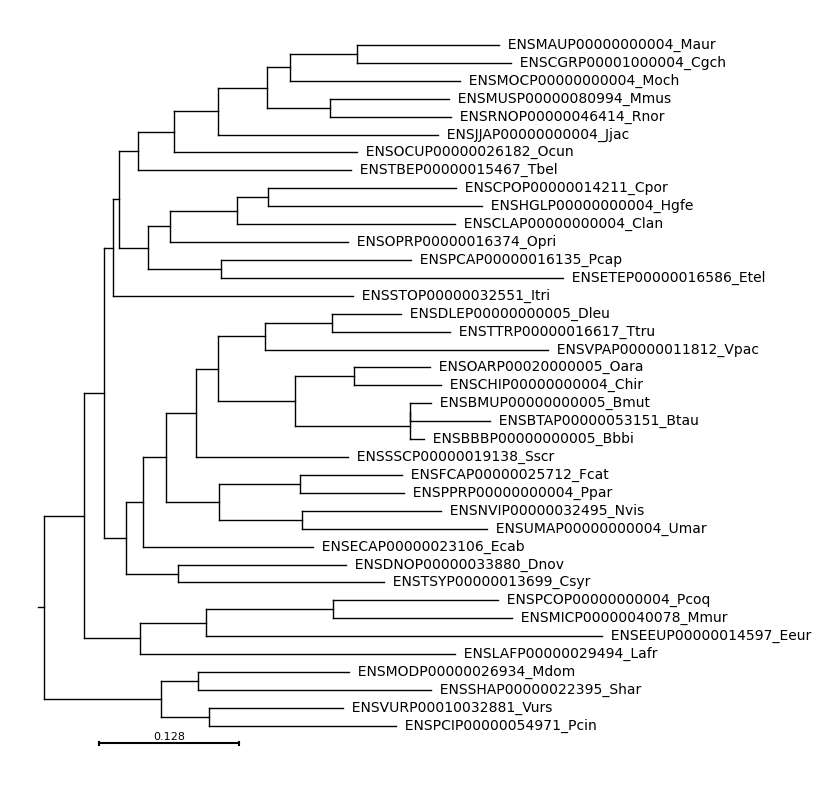

In [112]:
# Make the figure
fig = plt.figure(figsize=(8, 10))

# Add an ax
subp = fig.add_subplot(111)


# Draw the tree
tree1 = plot_phylo.plot_phylo(tree="MT_CO2_gene_tree_small.nh",
                              ax=subp,
                              show_support=False)

## 3. Add more informative tip labels

The tip labels in this tree are not particularly informative, we can improve this by building a dictionary and passing it to `plot_phylo`.

The tip labels here start with the [Ensembl Stable ID prefixes](https://www.ensembl.org/info/genome/stable_ids/prefixes.html) which I have saved in a file, `prefixes.txt`.

In [121]:
pref_dict = dict()
for line in open("prefixes.txt").readlines():
    pref, defi = line.strip().split("\t")
    pref_dict[pref] = defi

In [122]:
labels = dict()
for tip_lab in tree1:
    pref = tip_lab[0:6]
    if pref in pref_dict:
        labels[tip_lab] = pref_dict[pref]

In [131]:
rD = dict()
for key, val in labels.items():
    rD[val] = key

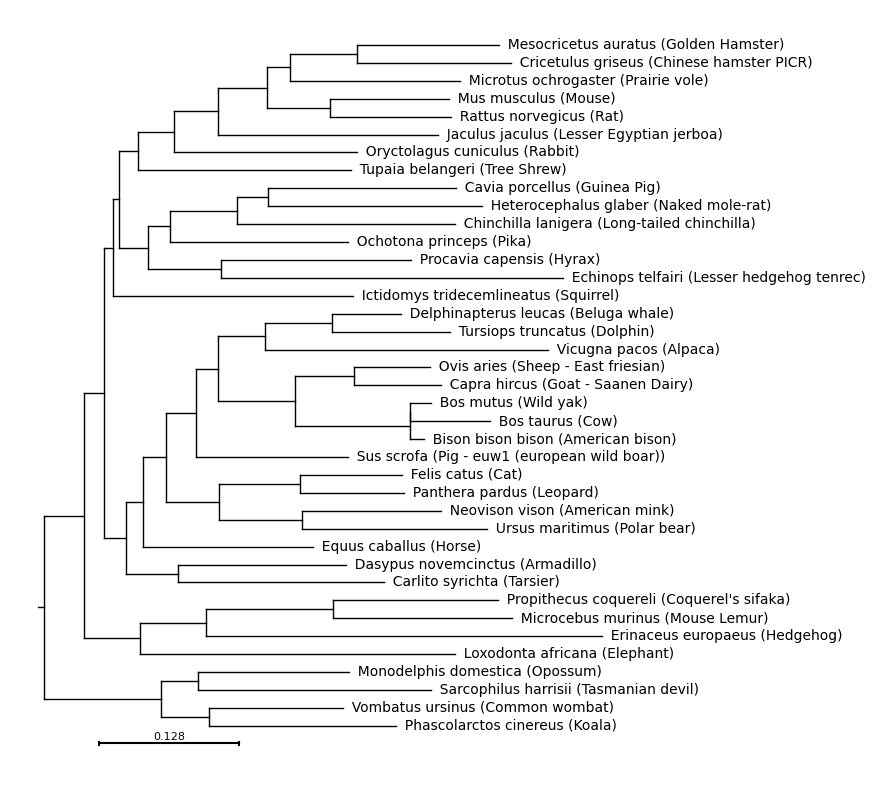

In [123]:
# Make the figure
fig = plt.figure(figsize=(8, 10))

# Add an ax
subp = fig.add_subplot(111)


# Draw the tree
tree2 = plot_phylo.plot_phylo(tree="MT_CO2_gene_tree_small.nh",
                              ax=subp,
                              show_support=False,
                              label_dict=labels)

## 4. Add an outgroup.

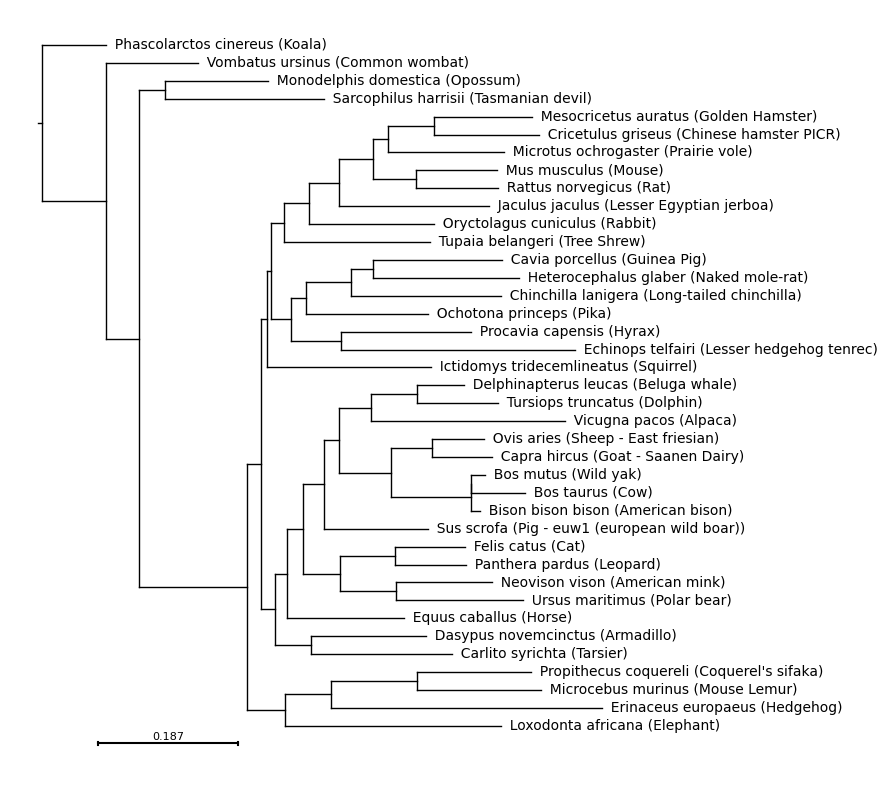

In [125]:
# Make the figure
fig = plt.figure(figsize=(8, 10))

# Add an ax
subp = fig.add_subplot(111)


# Draw the tree
tree3 = plot_phylo.plot_phylo(tree="MT_CO2_gene_tree_small.nh",
                              ax=subp,
                              show_support=False,
                              label_dict=labels,
                              outgroup='ENSPCIP00000054971_Pcin')

In [153]:
rodents = ['ENSMAUP00000000004_Maur',
           'ENSCGRP00001000004_Cgch',
           'ENSMOCP00000000004_Moch',
           'ENSMUSP00000080994_Mmus',
           'ENSRNOP00000046414_Rnor',
           'ENSJJAP00000000004_Jjac',
           'ENSCPOP00000014211_Cpor',
           'ENSHGLP00000000004_Hgfe',
           'ENSCLAP00000000004_Clan',
           'ENSSTOP00000032551_Itri']

In [159]:
colours = {}
for rodent in rodents:
    colours[rodent] = 'skyblue'

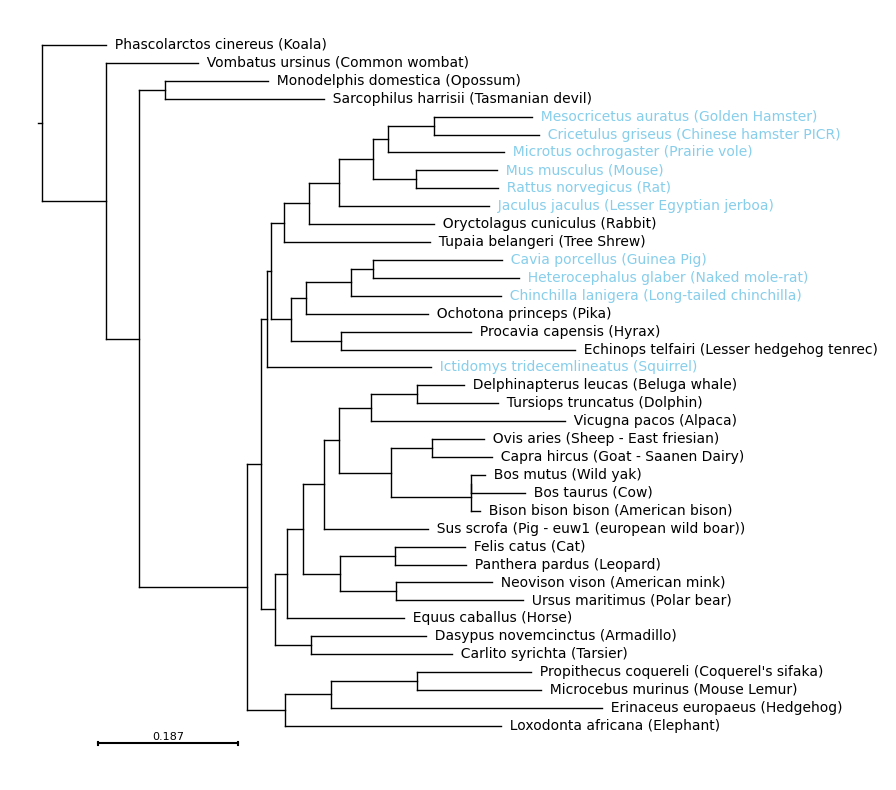

In [160]:
# Make the figure
fig = plt.figure(figsize=(8, 10))

# Add an ax
subp = fig.add_subplot(111)


# Draw the tree
tree3 = plot_phylo.plot_phylo(tree="MT_CO2_gene_tree_small.nh",
                              ax=subp,
                              show_support=False,
                              label_dict=labels,
                              col_dict=colours,
                              outgroup='ENSPCIP00000054971_Pcin')

In [144]:
rD

{'Mesocricetus auratus (Golden Hamster)': 'ENSMAUP00000000004_Maur',
 'Cricetulus griseus (Chinese hamster PICR)': 'ENSCGRP00001000004_Cgch',
 'Microtus ochrogaster (Prairie vole)': 'ENSMOCP00000000004_Moch',
 'Mus musculus (Mouse)': 'ENSMUSP00000080994_Mmus',
 'Rattus norvegicus (Rat)': 'ENSRNOP00000046414_Rnor',
 'Jaculus jaculus (Lesser Egyptian jerboa)': 'ENSJJAP00000000004_Jjac',
 'Oryctolagus cuniculus (Rabbit)': 'ENSOCUP00000026182_Ocun',
 'Tupaia belangeri (Tree Shrew)': 'ENSTBEP00000015467_Tbel',
 'Cavia porcellus (Guinea Pig)': 'ENSCPOP00000014211_Cpor',
 'Heterocephalus glaber (Naked mole-rat)': 'ENSHGLP00000000004_Hgfe',
 'Chinchilla lanigera (Long-tailed chinchilla)': 'ENSCLAP00000000004_Clan',
 'Ochotona princeps (Pika)': 'ENSOPRP00000016374_Opri',
 'Procavia capensis (Hyrax)': 'ENSPCAP00000016135_Pcap',
 'Echinops telfairi (Lesser hedgehog tenrec)': 'ENSETEP00000016586_Etel',
 'Ictidomys tridecemlineatus (Squirrel)': 'ENSSTOP00000032551_Itri',
 'Delphinapterus leucas (Be

## 4. Highlight rodent species

In [ ]:
ENSPCIP00000054971_Pcin